## <center>  Projet V0 <br/></center>
<a name="TOP">Nicolas-Yves XIBERAS -Version 1 Partie 1</a>

# Sommaire :
**<u>Intro</u>**
  - <a href="#P0A">Consignes</a>

  
**<u>MENU</u>**  
- Intro : SELECT CITYS</a> 78575 & 89069
- Import & functions
![image.png](attachment:85260d62-fd49-47fa-bf5c-83ab7b1c1f9a.png)
- <a href="#CatalogXLSX">P1 : TARGET</a>
- <a href="#CatalogXLSX">P2 : CREATE CATLOG & EXTRACT 2 EXEMPLE (rec size)</a>

(clefs et analyse)

    0 dep
    1 nomdep
    2 codecommune
    3 nomcommune
    4 TAR_inscrits
    5 TAR_votants
    6 TAR_exprimes
    7 DBL_voixAUG
    8 DBL_voixNUP
    9 DBL_voixDVG
    10 DBL_voixECO
    11 DBL_voixREG
    12 DBL_voixENS
    13 DBL_voixUDI
    14 DBL_voixLR
    15 DBL_voixDVD
    16 DBL_voixREC
    17 DBL_voixRN
    18 YYY_pvoixAUG
    19 YYY_pvoixNUP
    20 YYY_pvoixDVG
    21 YYY_pvoixECO
    22 YYY_pvoixREG
    23 YYY_pvoixENS
    24 YYY_pvoixUDI
    25 YYY_pvoixLR
    26 YYY_pvoixDVD
    27 YYY_pvoixREC
    28 YYY_pvoixRN
    29 TAR_electeurs

- 1 AUG : Gauche de la Gauche (divers)
- 2 NUP : NUPES
- 3 DVG : Divers Gauche
- 4 ECO : Ecologistes
- 5 REG : Regionalistes
- 6 ENS : Ensemble (MACRON)
- 7 UDI : Union des Demacrates Independantes
- 8 LR : Les républicains
- 9 DVD : Divers Droite
- 10 REC : Reconquete
- 11 RN : Rassemblement National

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def df_creat(filename, df_dataframe):  
    df = df_dataframe[df_dataframe['filename'] == filename]
    if len(df) == 1:
        row = df.iloc[0]
        file = row['path']
        if os.path.exists(file):
            df_from_csv = pd.read_csv(file, encoding='utf-8', low_memory=False)
            return df_from_csv
        else:
            print('FICHIER NON TROUVE', file)
            return pd.DataFrame()
    else:
        print(f"filename: '{filename}' return size: {len(df)}")
        return pd.DataFrame()

In [4]:
csv_file_path = 'df_filtred.csv'
# Use pandas to read the CSV file into a DataFrame with UTF-8 encoding
df_cat = pd.read_csv(csv_file_path, encoding='utf-8')

In [5]:
df_cat.head(5)

,category,filename,comment,size,depart,district,commune,canton,yyyy,path,codecommune
0,Taille_agglo_commune_csv,codescommunes1999,codes,0,0,0,1,0,1999,../../ProjetCommun/DATA_SOURCES/HCP/Taille_agg...,1
1,Taille_agglo_commune_csv,popcommunes,pop,0,0,0,1,0,0,../../ProjetCommun/DATA_SOURCES/HCP/Taille_agg...,1
2,Taille_agglo_commune_csv,codescommunesnomsmultiples,codesnomsmultiples,0,0,0,1,0,0,../../ProjetCommun/DATA_SOURCES/HCP/Taille_agg...,0
3,Taille_agglo_commune_csv,popcommuneselecteurs,popelecteurs,0,0,0,1,0,0,../../ProjetCommun/DATA_SOURCES/HCP/Taille_agg...,1
4,Taille_agglo_commune_csv,codescommunes2014,codes,0,0,0,1,0,2014,../../ProjetCommun/DATA_SOURCES/HCP/Taille_agg...,1


In [6]:
df = df_creat('leg2022comm', df_cat)

In [7]:
df.shape

(34870, 88)

In [8]:
 list_voix = ['voixAUG',
 'voixNUP',
 'voixDVG',
 'voixECO',
 'voixREG',
 'voixENS',
 'voixUDI',
 'voixLR',
 'voixDVD',
 'voixREC',
 'voixRN']

sum_per_column = df[list_voix].sum()   
sum_per_column

voixAUG     265388
voixNUP    6154534
voixDVG     695253
voixECO     616832
voixREG     380496
voixENS    6005377
voixUDI     414102
voixLR     2421938
voixDVD     731530
voixREC    1007762
voixRN     4288334
dtype: int64

In [9]:
sum_per_column.min()

265388

In [10]:
print (sum_per_column,len(sum_per_column))

voixAUG     265388
voixNUP    6154534
voixDVG     695253
voixECO     616832
voixREG     380496
voixENS    6005377
voixUDI     414102
voixLR     2421938
voixDVD     731530
voixREC    1007762
voixRN     4288334
dtype: int64 11


In [11]:
list_voix_final={}
list_voix_final['NUP'] = sum_per_column['voixNUP']
list_voix_final['ECO'] = sum_per_column['voixECO']
list_voix_final['ENS'] = sum_per_column['voixENS']
list_voix_final['LR'] = sum_per_column['voixLR'] + sum_per_column['voixUDI']
list_voix_final['EXTREMD'] = sum_per_column['voixREC'] + sum_per_column['voixRN']
list_voix_final['CENTRE'] = sum_per_column['voixDVD'] + sum_per_column['voixDVG']
list_voix_final['OTR'] = sum_per_column['voixREG'] + sum_per_column['voixAUG']
list_voix_final

{'NUP': 6154534,
 'ECO': 616832,
 'ENS': 6005377,
 'LR': 2836040,
 'EXTREMD': 5296096,
 'CENTRE': 1426783,
 'OTR': 645884}

In [12]:
sum(list_voix_final.values())-sum_per_column.sum()

0

In [169]:
# Calculate the total sum of values
total_sum = sum(list_voix_final.values())
# Convert each number to percentage
percentage_data = {key: (value / total_sum) * 100 for key, value in list_voix_final.items()}
# Display the result
print(percentage_data)


{'NUP': 26.780330618314363, 'ECO': 2.684031787939767, 'ENS': 26.13130117529952, 'LR': 12.340510077085327, 'EXTREMD': 23.044994449024447, 'CENTRE': 6.208385632541867, 'OTR': 2.810446259794707}


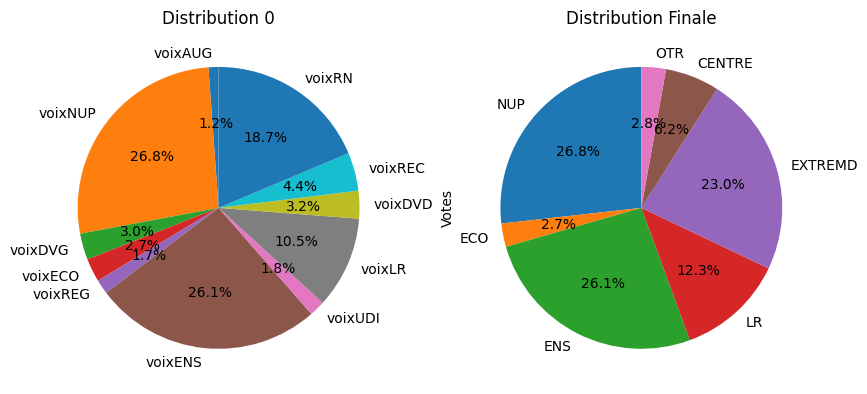

In [115]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first pie chart (sum_per_column)
sum_per_column.plot.pie(autopct='%1.1f%%', startangle=90, ax=axs[0])
axs[0].set_title('Distribution 0')

# Plot the second pie chart (df_votes)
df_votes.plot.pie(y='Votes', labels=df_votes['Party'], autopct='%1.1f%%', startangle=90, legend=None, ax=axs[1])
axs[1].set_title('Distribution Finale')

plt.show()

In [116]:
liste_colonnes = df.columns.tolist()
liste_colonnes

['dep',
 'nomdep',
 'codecommune',
 'nomcommune',
 'inscrits',
 'votants',
 'exprimes',
 'voixAUG',
 'voixNUP',
 'voixDVG',
 'voixECO',
 'voixREG',
 'voixENS',
 'voixUDI',
 'voixLR',
 'voixDVD',
 'voixREC',
 'voixRN',
 'pvoixAUG',
 'pvoixNUP',
 'pvoixDVG',
 'pvoixECO',
 'pvoixREG',
 'pvoixENS',
 'pvoixUDI',
 'pvoixLR',
 'pvoixDVD',
 'pvoixREC',
 'pvoixRN',
 'pvoixAUGratio',
 'pvoixNUPratio',
 'pvoixDVGratio',
 'pvoixECOratio',
 'pvoixREGratio',
 'pvoixENSratio',
 'pvoixUDIratio',
 'pvoixLRratio',
 'pvoixDVDratio',
 'pvoixRECratio',
 'pvoixRNratio',
 'voteG',
 'voteCG',
 'voteC',
 'voteCD',
 'voteD',
 'voteTG',
 'voteTD',
 'voteGCG',
 'voteDCD',
 'pvoteG',
 'pvoteCG',
 'pvoteC',
 'pvoteCD',
 'pvoteD',
 'pvoteTG',
 'pvoteTD',
 'pvoteGCG',
 'pvoteDCD',
 'pvoteGratio',
 'pvoteCGratio',
 'pvoteCratio',
 'pvoteCDratio',
 'pvoteDratio',
 'pvoteGCGratio',
 'pvoteDCDratio',
 'pvoteTGratio',
 'pvoteTDratio',
 'pervoteG',
 'pervoteCG',
 'pervoteC',
 'pervoteCD',
 'pervoteD',
 'pervoteGCG',
 'perv

In [117]:
col_select=['dep',
    'nomdep',
    'codecommune',
    'nomcommune',
    'inscrits',
    'votants',
    'exprimes',
    'voixAUG',
    'voixNUP',
    'voixDVG',
    'voixECO',
    'voixREG',
    'voixENS',
    'voixUDI',
    'voixLR',
    'voixDVD',
    'voixREC',
    'voixRN',
    'pvoixAUG',
    'pvoixNUP',
    'pvoixDVG',
    'pvoixECO',
    'pvoixREG',
    'pvoixENS',
    'pvoixUDI',
    'pvoixLR',
    'pvoixDVD',
    'pvoixREC',
    'pvoixRN',
    'electeurs']

In [118]:
dfC = df[col_select]
dfC.shape

(34870, 30)

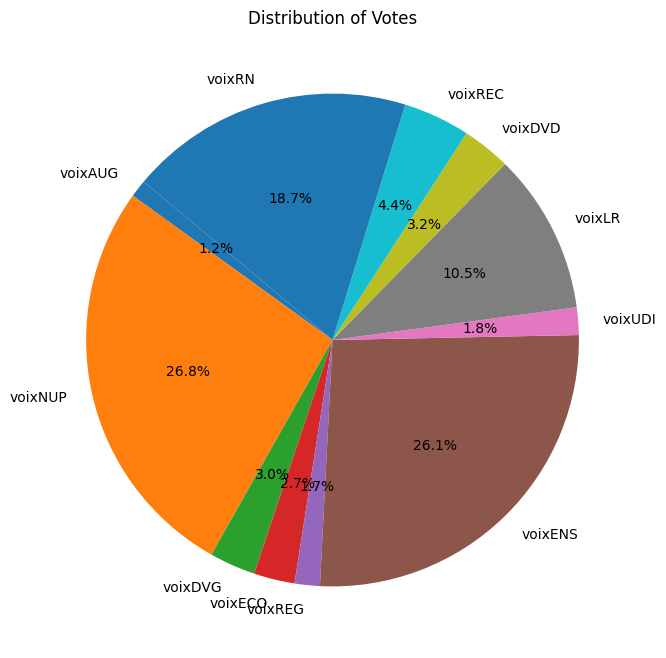

In [119]:
# Selecting relevant columns
columns_to_plot = ['voixAUG', 'voixNUP', 'voixDVG', 'voixECO', 'voixREG', 'voixENS', 'voixUDI', 'voixLR', 'voixDVD', 'voixREC', 'voixRN']

# Creating a new DataFrame with selected columns
df_plot = dfC[columns_to_plot]

# Calculating the sum of each column
sum_values = df_plot.sum()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sum_values, labels=sum_values.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Votes')
plt.show()

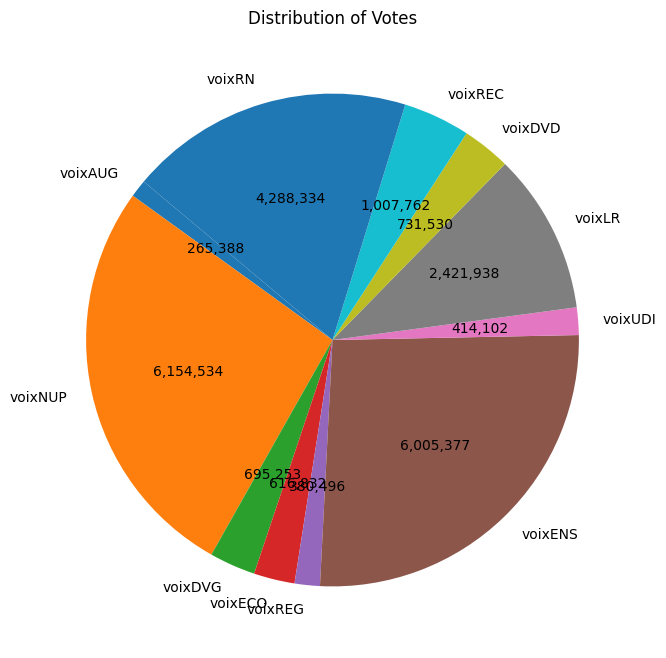

In [120]:
# Selecting relevant columns
columns_to_plot = ['voixAUG', 'voixNUP', 'voixDVG', 'voixECO', 'voixREG', 'voixENS', 'voixUDI', 'voixLR', 'voixDVD', 'voixREC', 'voixRN']

# Creating a new DataFrame with selected columns
df_plot = dfC[columns_to_plot]

# Calculating the sum of each column
sum_values = df_plot.sum()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sum_values, labels=sum_values.index, autopct=lambda p: '{:,.0f}'.format(p * sum_values.sum() / 100), startangle=140)
plt.title('Distribution of Votes')
plt.show()

In [121]:
col=['voixAUG',
    'voixNUP',
    'voixDVG',
    'voixECO',
    'voixREG',
    'voixENS',
    'voixUDI',
    'voixLR',
    'voixDVD',
    'voixREC',
    'voixRN',
    'pvoixAUG',
    'pvoixNUP',
    'pvoixDVG',
    'pvoixECO',
    'pvoixREG',
    'pvoixENS',
    'pvoixUDI',
    'pvoixLR',
    'pvoixDVD',
    'pvoixREC',
    'pvoixRN']

col=['pvoixAUG',
    'pvoixNUP',
    'pvoixDVG',
    'pvoixECO',
    'pvoixREG',
    'pvoixENS',
    'pvoixUDI',
    'pvoixLR',
    'pvoixDVD',
    'pvoixREC',
    'pvoixRN']


minmax_scor= {}
for c in col : 
    minmax_scor[c]=[dfC[c].idxmax(axis=0)]
minmax_scor    

{'pvoixAUG': [1822],
 'pvoixNUP': [1745],
 'pvoixDVG': [10580],
 'pvoixECO': [15975],
 'pvoixREG': [10693],
 'pvoixENS': [18580],
 'pvoixUDI': [10659],
 'pvoixLR': [19751],
 'pvoixDVD': [2507],
 'pvoixREC': [635],
 'pvoixRN': [20361]}

In [122]:
for column, values in minmax_scor.items():
    print(f"{column}:")
    print(f"   Mac value line {values[0]} : {dfC[column].iloc[values[0]]}")
    print(dfC.iloc[values[0]])
    print('\n------------')

pvoixAUG:
   Mac value line 1822 : 0.34782609
dep                           05
nomdep              HAUTES-ALPES
codecommune                05131
nomcommune     SAINT-AUBAN-D'OZE
inscrits                      71
votants                       50
exprimes                    46.0
voixAUG                       16
voixNUP                       14
voixDVG                        0
voixECO                        3
voixREG                        0
voixENS                        3
voixUDI                        0
voixLR                         2
voixDVD                        0
voixREC                        1
voixRN                         7
pvoixAUG                0.347826
pvoixNUP                0.304348
pvoixDVG                     0.0
pvoixECO                0.065217
pvoixREG                     0.0
pvoixENS                0.065217
pvoixUDI                     0.0
pvoixLR                 0.043478
pvoixDVD                     0.0
pvoixREC                0.021739
pvoixRN                 0.1521

In [123]:
nan_counts = dfC.isna().sum()

# Display the result
print(nan_counts)

dep             0
nomdep          0
codecommune     0
nomcommune      0
inscrits        0
votants         0
exprimes        0
voixAUG         0
voixNUP         0
voixDVG         0
voixECO         0
voixREG         0
voixENS         0
voixUDI         0
voixLR          0
voixDVD         0
voixREC         0
voixRN          0
pvoixAUG        0
pvoixNUP        0
pvoixDVG        0
pvoixECO        0
pvoixREG        0
pvoixENS        0
pvoixUDI        0
pvoixLR         0
pvoixDVD        0
pvoixREC        0
pvoixRN         0
electeurs      77
dtype: int64


In [124]:
nan_rows = dfC[dfC['electeurs'].isna()]
print(nan_rows)

      dep                   nomdep codecommune                  nomcommune  \
723    02                    AISNE       02344                     CORMICY   
1580   04  ALPES-DE-HAUTE-PROVENCE       04091                   GANAGOBIE   
3921   11                     AUDE       11354      SAINT-MARTIN-DES-PUITS   
4411   13         BOUCHES-DU-RHONE       13119         CARNOUX-EN-PROVENCE   
4412   13         BOUCHES-DU-RHONE       13201                   MARSEILLE   
...    ..                      ...         ...                         ...   
30608  78                 YVELINES       78242          FONTENAY-LE-FLEURY   
30666  78                 YVELINES       78383                    MAUREPAS   
33772  88                   VOSGES       88460  SOULOSSE-SOUS-SAINT-ELOPHE   
34393  91                  ESSONNE       91097        BOUSSY-SAINT-ANTOINE   
34524  91                  ESSONNE       91570       SAINT-MICHEL-SUR-ORGE   

       inscrits  votants  exprimes  voixAUG  voixNUP  voixDVG  

En résumé, être "inscrit sur les listes" est souvent le premier pas administratif permettant de devenir "électeur". Être un "électeur" signifie que la personne a non seulement accompli les démarches d'inscription, mais qu'elle est également en mesure de participer effectivement au processus démocratique en exprimant son vote lors des élections.

In [125]:
dfC['inscrits'].dtype

dtype('int64')

In [126]:
dfC['inscrits'].isna().sum()

0

In [127]:
dfC['inscrits'].fillna(0, inplace=True)

# Define the bins
bins = [0, 10, 25, 50, 100, 500, 1000, 5000, 10000, 25000, 100000, 1000000, 50000000]

# Use numpy.histogram to count the number of lines in each bin
hist_counts, bin_edges = np.histogram(dfC['inscrits'], bins=bins)

# Display the counts for each bin
for i in range(len(hist_counts)):
    lower_bound = '{:,.0f}'.format(bins[i])
    upper_bound = '{:,.0f}'.format(bins[i+1])
    print(f"Bin {i + 1}: [{lower_bound} ; {upper_bound}] {hist_counts[i]:,.0f} lines")

Bin 1: [0 ; 10] 6 lines
Bin 2: [10 ; 25] 121 lines
Bin 3: [25 ; 50] 913 lines
Bin 4: [50 ; 100] 3,306 lines
Bin 5: [100 ; 500] 16,690 lines
Bin 6: [500 ; 1,000] 6,012 lines
Bin 7: [1,000 ; 5,000] 6,257 lines
Bin 8: [5,000 ; 10,000] 897 lines
Bin 9: [10,000 ; 25,000] 468 lines
Bin 10: [25,000 ; 100,000] 180 lines
Bin 11: [100,000 ; 1,000,000] 19 lines
Bin 12: [1,000,000 ; 50,000,000] 1 lines


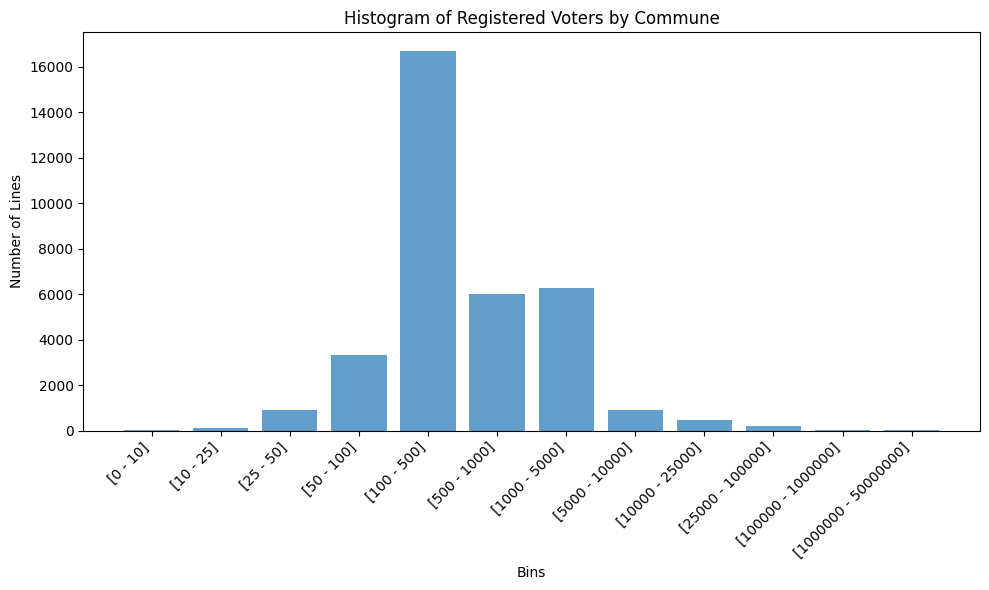

In [128]:
bins = [0, 10, 25, 50, 100, 500, 1000, 5000, 10000, 25000, 100000, 1000000, 50000000]

# Use numpy.histogram to count the number of lines in each bin
hist_counts, bin_edges = np.histogram(dfC['inscrits'], bins=bins)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(range(len(hist_counts)), hist_counts, align='center', alpha=0.7)
plt.xticks(range(len(hist_counts)), [f'[{bins[i]} - {bins[i+1]}]' for i in range(len(hist_counts))], rotation=45, ha='right')
plt.xlabel('Bins')
plt.ylabel('Number of Lines')
plt.title('Histogram of Registered Voters by Commune')
plt.tight_layout()
plt.show()

Bin 1: [0 - 10] Sum: 45
Bin 2: [10 - 25] Sum: 2,365
Bin 3: [25 - 50] Sum: 35,433
Bin 4: [50 - 100] Sum: 251,051
Bin 5: [100 - 500] Sum: 4,254,742
Bin 6: [500 - 1,000] Sum: 4,256,548
Bin 7: [1,000 - 5,000] Sum: 13,138,244
Bin 8: [5,000 - 10,000] Sum: 6,178,434
Bin 9: [10,000 - 25,000] Sum: 7,200,023
Bin 10: [25,000 - 100,000] Sum: 7,810,488
Bin 11: [100,000 - 1,000,000] Sum: 3,242,786
Bin 12: [1,000,000 - 50,000,000] Sum: 1,362,500


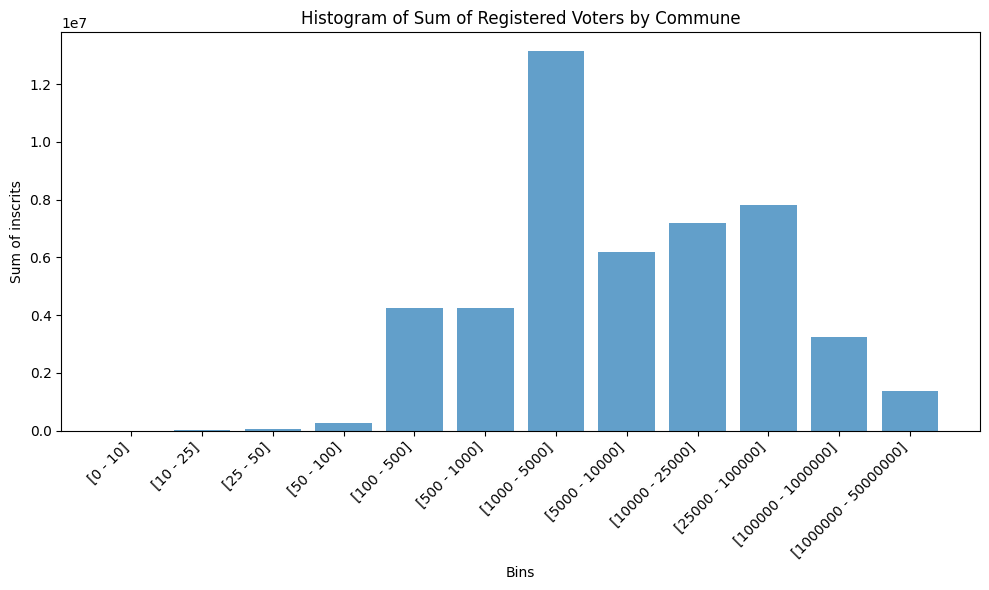

In [129]:
# Use numpy.histogram to sum the 'inscrits' values in each bin
hist_sum, bin_edges = np.histogram(dfC['inscrits'], bins=bins, weights=dfC['inscrits'])

# Display the sum of 'inscrits' for each bin
for i in range(len(hist_sum)):
    lower_bound = '{:,.0f}'.format(bins[i])
    upper_bound = '{:,.0f}'.format(bins[i+1])
    print(f"Bin {i + 1}: [{lower_bound} - {upper_bound}] Sum: {hist_sum[i]:,.0f}")

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(range(len(hist_sum)), hist_sum, align='center', alpha=0.7)
plt.xticks(range(len(hist_sum)), [f'[{bins[i]} - {bins[i+1]}]' for i in range(len(hist_sum))], rotation=45, ha='right')
plt.xlabel('Bins')
plt.ylabel('Sum of inscrits')
plt.title('Histogram of Sum of Registered Voters by Commune')
plt.tight_layout()
plt.show()

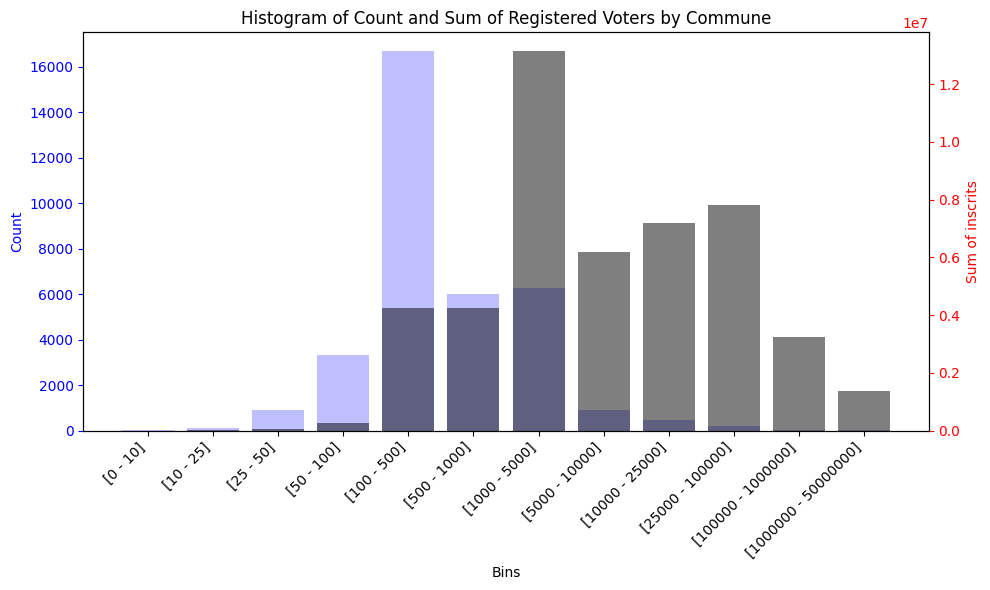

In [130]:
# Define the bins
bins = [0, 10, 25, 50, 100, 500, 1000, 5000, 10000, 25000, 100000, 1000000, 50000000]

# Use numpy.histogram to count the number of lines in each bin
hist_counts, bin_edges = np.histogram(dfC['inscrits'], bins=bins)

# Use numpy.histogram to sum the 'inscrits' values in each bin
hist_sum, bin_edges = np.histogram(dfC['inscrits'], bins=bins, weights=dfC['inscrits'])

# Plotting both histograms on the same graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting count histogram
ax1.bar(range(len(hist_counts)), hist_counts, alpha=0.25, color='blue', label='Count')
ax1.set_xlabel('Bins')
ax1.set_ylabel('Count', color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_xticks(range(len(hist_counts)))
ax1.set_xticklabels([f'[{bins[i]} - {bins[i+1]}]' for i in range(len(hist_counts))], rotation=45, ha='right')

# Creating a secondary y-axis for the sum histogram
ax2 = ax1.twinx()
ax2.bar(range(len(hist_sum)), hist_sum, alpha=0.5, color='black', label='Sum')
ax2.set_ylabel('Sum of inscrits', color='red')
ax2.tick_params('y', colors='red')

plt.title('Histogram of Count and Sum of Registered Voters by Commune')
plt.tight_layout()
plt.show()

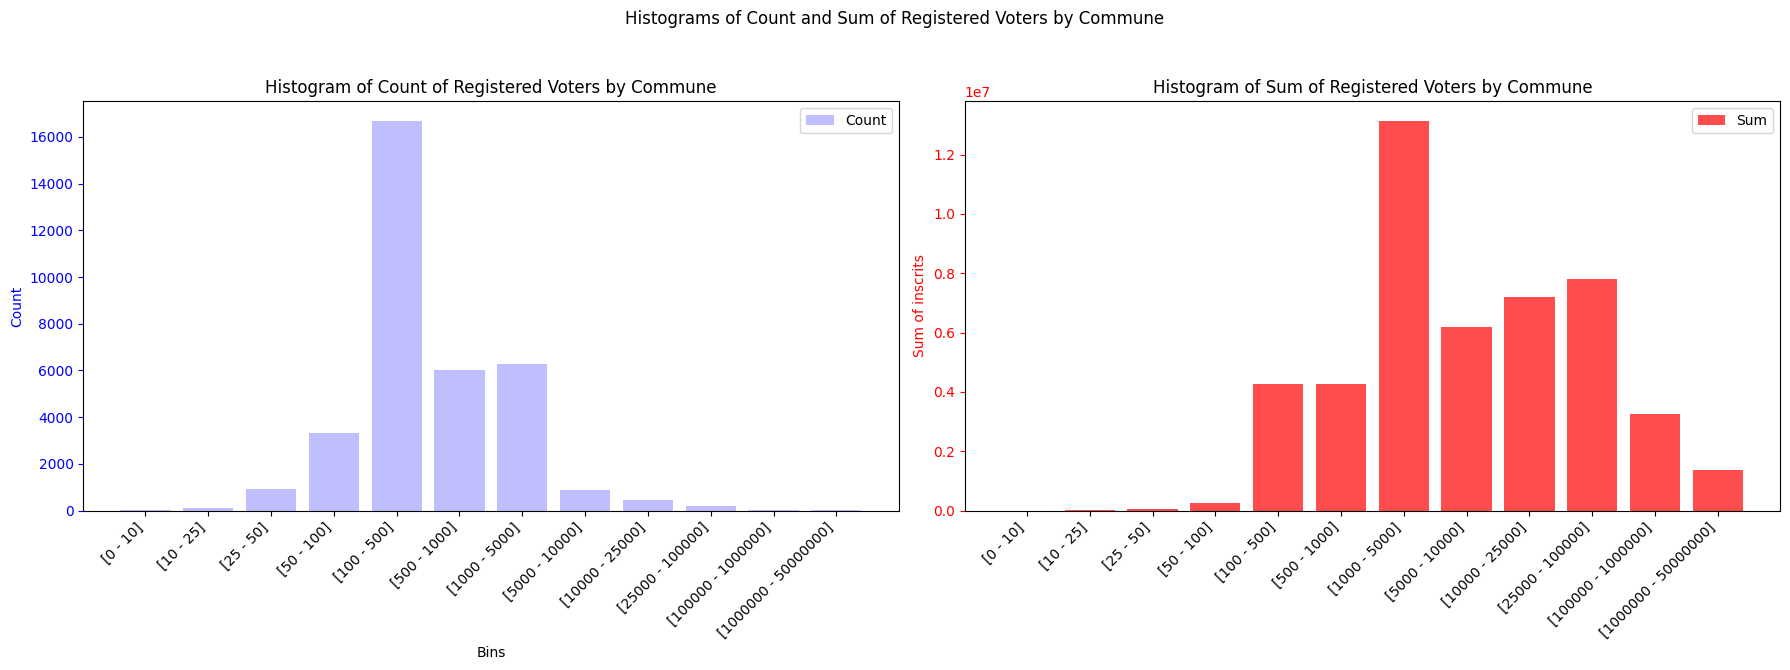

In [131]:
dfC['inscrits'].fillna(0, inplace=True)

# Define the bins
bins = [0, 10, 25, 50, 100, 500, 1000, 5000, 10000, 25000, 100000, 1000000, 50000000]

# Use numpy.histogram to count the number of lines in each bin
hist_counts, bin_edges = np.histogram(dfC['inscrits'], bins=bins)

# Use numpy.histogram to sum the 'inscrits' values in each bin
hist_sum, bin_edges = np.histogram(dfC['inscrits'], bins=bins, weights=dfC['inscrits'])

# Create a figure with two subplots in one row and two columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plotting count histogram with alpha=0.25 on ax1
ax1.bar(range(len(hist_counts)), hist_counts, alpha=0.25, color='blue', label='Count')
ax1.set_xlabel('Bins')
ax1.set_ylabel('Count', color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_xticks(range(len(hist_counts)))
ax1.set_xticklabels([f'[{bins[i]} - {bins[i+1]}]' for i in range(len(hist_counts))], rotation=45, ha='right')
ax1.set_title('Histogram of Count of Registered Voters by Commune')
ax1.legend()

# Creating a secondary y-axis for the sum histogram on ax2
ax2.bar(range(len(hist_sum)), hist_sum, alpha=0.7, color='red', label='Sum')
ax2.set_ylabel('Sum of inscrits', color='red')
ax2.tick_params('y', colors='red')
ax2.set_title('Histogram of Sum of Registered Voters by Commune')
ax2.legend()

# Setting x-axis tick labels for ax2
ax2.set_xticks(range(len(hist_sum)))
ax2.set_xticklabels([f'[{bins[i]} - {bins[i+1]}]' for i in range(len(hist_sum))], rotation=45, ha='right')

plt.suptitle('Histograms of Count and Sum of Registered Voters by Commune')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for the title
plt.show()


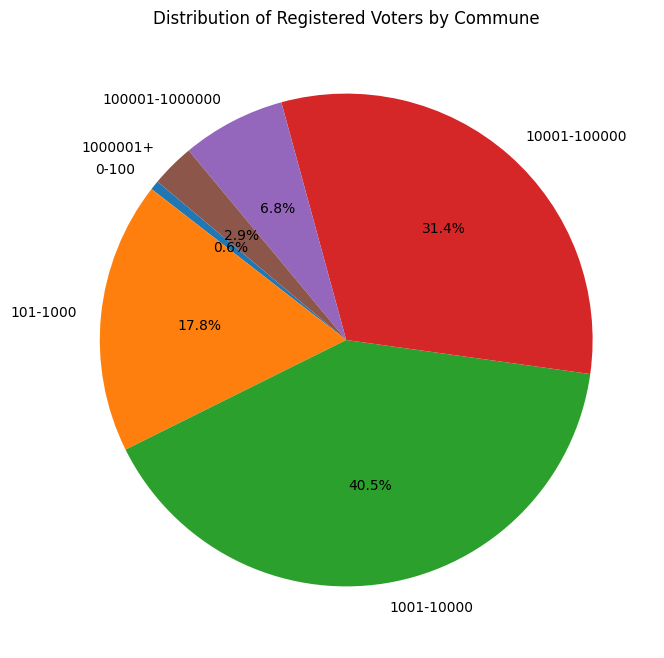

In [132]:

# Define labels and sizes for the pie chart
labels = ['0-100', '101-1000', '1001-10000', '10001-100000', '100001-1000000', '1000001+']
sizes = [
    dfC[(dfC['inscrits'] >= 0) & (dfC['inscrits'] <= 100)]['inscrits'].sum(),
    dfC[(dfC['inscrits'] >= 101) & (dfC['inscrits'] <= 1000)]['inscrits'].sum(),
    dfC[(dfC['inscrits'] >= 1001) & (dfC['inscrits'] <= 10000)]['inscrits'].sum(),
    dfC[(dfC['inscrits'] >= 10001) & (dfC['inscrits'] <= 100000)]['inscrits'].sum(),
    dfC[(dfC['inscrits'] >= 100001) & (dfC['inscrits'] <= 1000000)]['inscrits'].sum(),
    dfC[dfC['inscrits'] > 1000000]['inscrits'].sum()
]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Registered Voters by Commune')
plt.show()

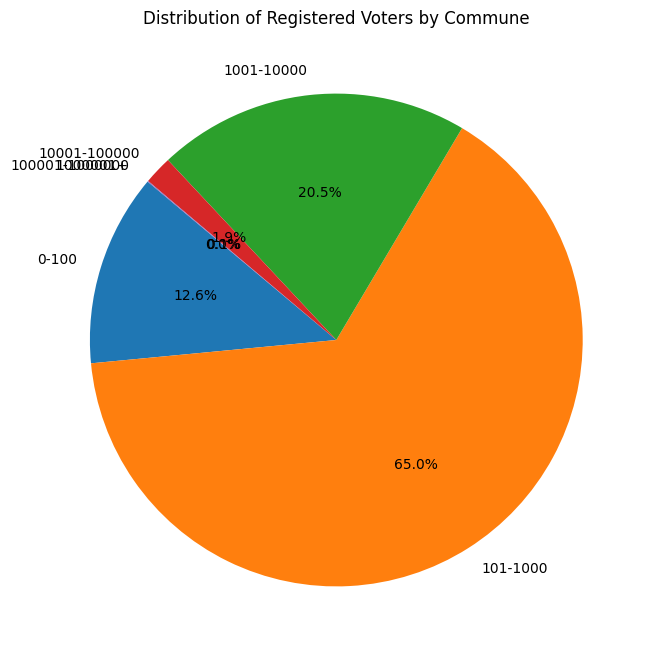

In [133]:
# Define labels and sizes for the pie chart
labels = ['0-100', '101-1000', '1001-10000', '10001-100000', '100001-1000000', '1000001+']
sizes = [
    dfC[(dfC['inscrits'] >= 0) & (dfC['inscrits'] <= 100)]['inscrits'].count(),
    dfC[(dfC['inscrits'] >= 101) & (dfC['inscrits'] <= 1000)]['inscrits'].count(),
    dfC[(dfC['inscrits'] >= 1001) & (dfC['inscrits'] <= 10000)]['inscrits'].count(),
    dfC[(dfC['inscrits'] >= 10001) & (dfC['inscrits'] <= 100000)]['inscrits'].count(),
    dfC[(dfC['inscrits'] >= 100001) & (dfC['inscrits'] <= 1000000)]['inscrits'].count(),
    dfC[dfC['inscrits'] > 1000000]['inscrits'].count()
]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Registered Voters by Commune')
plt.show()

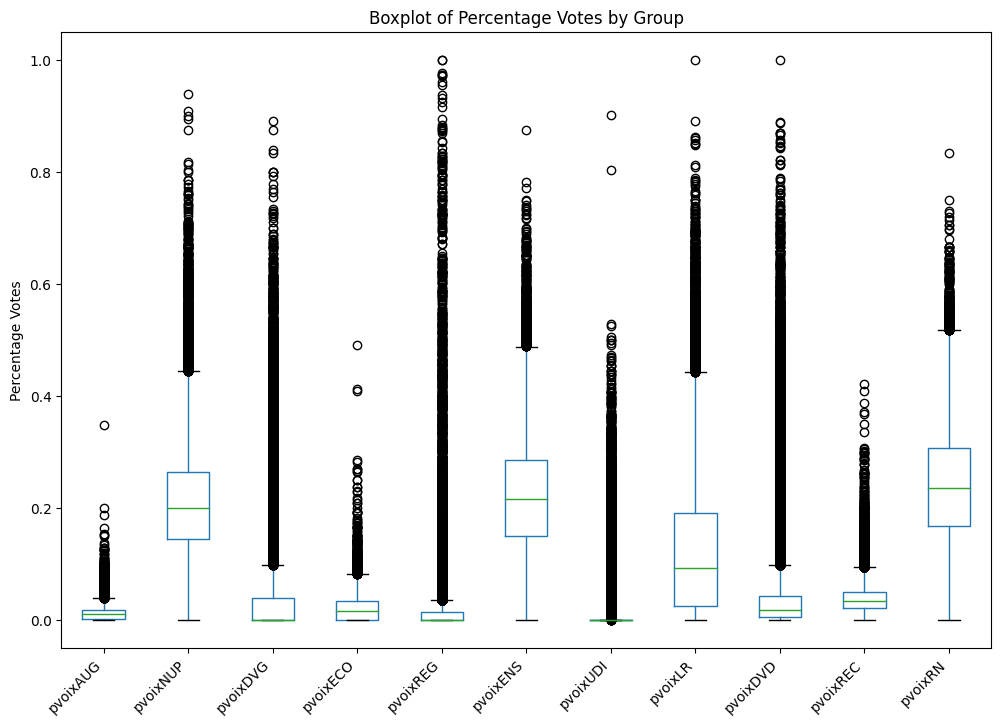

In [134]:
columns_to_plot = ['pvoixAUG', 'pvoixNUP', 'pvoixDVG', 'pvoixECO', 'pvoixREG', 'pvoixENS', 'pvoixUDI', 'pvoixLR', 'pvoixDVD', 'pvoixREC', 'pvoixRN']

# Create a new DataFrame with the selected columns
df_boxplot = dfC[columns_to_plot]

# Plotting the boxplot
plt.figure(figsize=(12, 8))
df_boxplot.boxplot(grid=False)
plt.title('Boxplot of Percentage Votes by Group')
plt.ylabel('Percentage Votes')
plt.xticks(rotation=45, ha='right')
plt.show()

In [135]:
dfC500p=dfC[dfC['inscrits']>499]
dfC500p.shape

(13834, 30)

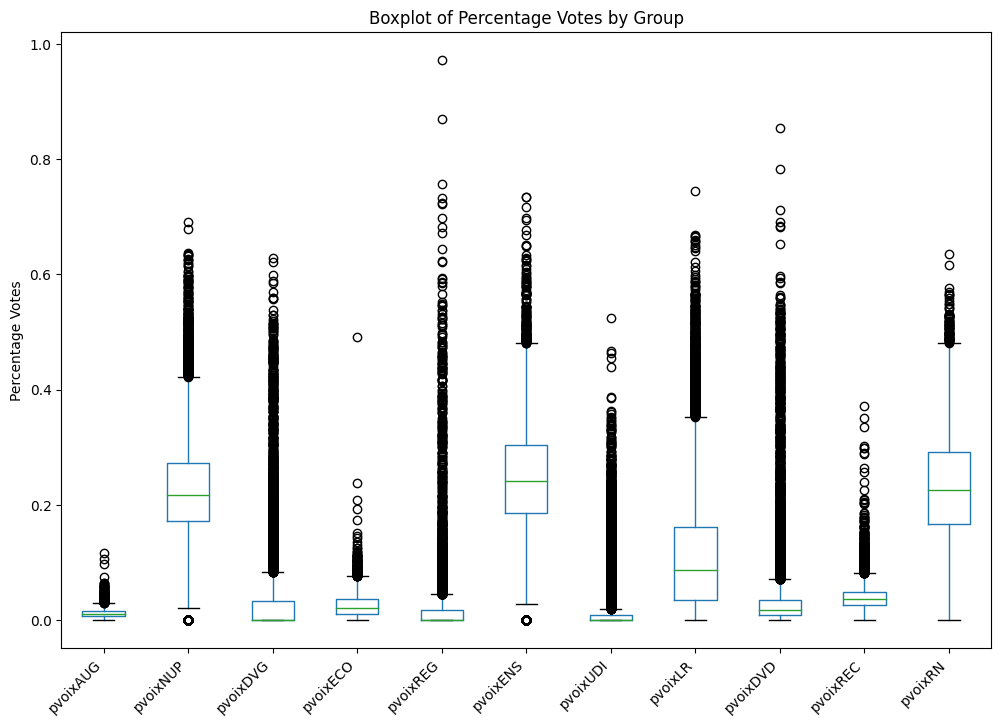

In [136]:
columns_to_plot = ['pvoixAUG', 'pvoixNUP', 'pvoixDVG', 'pvoixECO', 'pvoixREG', 'pvoixENS', 'pvoixUDI', 'pvoixLR', 'pvoixDVD', 'pvoixREC', 'pvoixRN']

# Create a new DataFrame with the selected columns
df_boxplot = dfC500p[columns_to_plot]

# Plotting the boxplot
plt.figure(figsize=(12, 8))
df_boxplot.boxplot(grid=False)
plt.title('Boxplot of Percentage Votes by Group')
plt.ylabel('Percentage Votes')
plt.xticks(rotation=45, ha='right')
plt.show()

In [137]:
bins = [0, 10, 25, 50, 100, 500, 1000, 5000, 10000, 25000, 100000, 1000000, 50000000]
nb_lines = {}
for b in bins :
    nb_lines[b]=len(dfC[dfC['inscrits']>=b])
print (nb_lines)

{0: 34870, 10: 34864, 25: 34743, 50: 33830, 100: 30524, 500: 13834, 1000: 7822, 5000: 1565, 10000: 668, 25000: 200, 100000: 20, 1000000: 1, 50000000: 0}


In [138]:

nb_lines2 = {}
for b in range(25,760,25) :
    nb_lines2[b]= dfC[dfC['inscrits'] >= b]['inscrits'].count(),
print (nb_lines2)

{25: (34743,), 50: (33830,), 75: (32293,), 100: (30524,), 125: (28686,), 150: (27027,), 175: (25461,), 200: (23973,), 225: (22595,), 250: (21411,), 275: (20311,), 300: (19330,), 325: (18491,), 350: (17686,), 375: (16933,), 400: (16239,), 425: (15581,), 450: (14941,), 475: (14376,), 500: (13834,), 525: (13352,), 550: (12881,), 575: (12442,), 600: (12045,), 625: (11652,), 650: (11329,), 675: (11008,), 700: (10687,), 725: (10383,), 750: (10096,)}


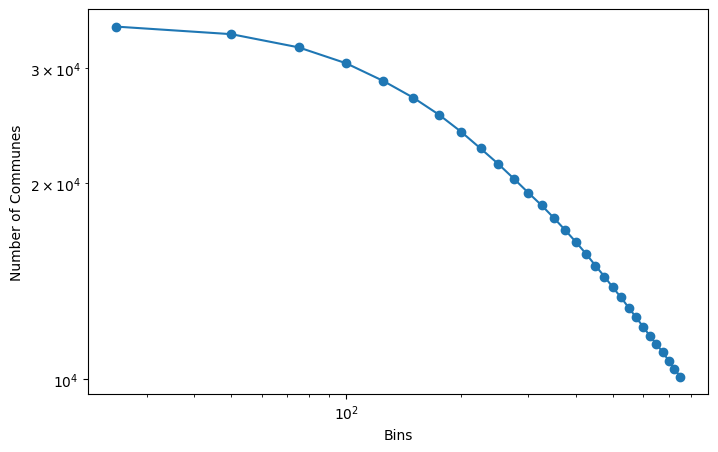

In [139]:
# Extracting keys and values
keys = list(nb_lines2.keys())
values = list(nb_lines2.values())

# Plotting the linear graph
plt.figure(figsize=(8, 5))
plt.plot(keys, values, marker='o', linestyle='-')
plt.xscale('log')  # Use a logarithmic scale on the x-axis for better visibility
plt.yscale('log')  # Use a logarithmic scale on the y-axis for better visibility
plt.xlabel('Bins')
plt.ylabel('Number of Communes')
plt.show()

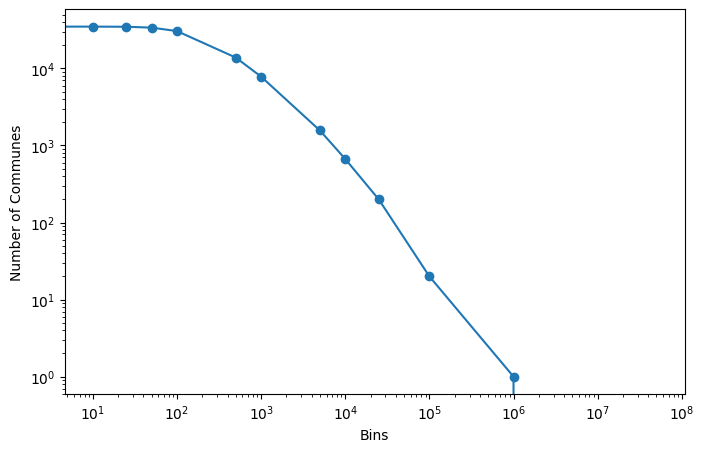

In [140]:

# Extracting keys and values
keys = list(nb_lines.keys())
values = list(nb_lines.values())

# Plotting the linear graph
plt.figure(figsize=(8, 5))
plt.plot(keys, values, marker='o', linestyle='-')
plt.xscale('log')  # Use a logarithmic scale on the x-axis for better visibility
plt.yscale('log')  # Use a logarithmic scale on the y-axis for better visibility
plt.xlabel('Bins')
plt.ylabel('Number of Communes')
plt.show()

In [141]:
list_codecommune = dfC['codecommune'].unique()
len(list_codecommune),len(dfC)

(34870, 34870)

In [142]:
# Specify the file path
file_path = '../DATA/list_codecommune_leg2022_FULL.txt'

# Open the file in write mode
with open(file_path, 'w') as file:
    # Write each element of the list to a new line
    for item in list_codecommune:
        file.write(str(item) + '\n')

print(f"List exported to {file_path}")

List exported to ../DATA/list_codecommune_leg2022_FULL.txt


In [143]:
file_path50 = '../DATA/list_codecommune_leg2022_50inscrits.txt'
list_codecommune_50 = dfC[dfC['inscrits']>=50]['codecommune'].unique()
# Open the file in write mode
with open(file_path50, 'w') as file:
    # Write each element of the list to a new line
    for item in list_codecommune_50 :
        file.write(str(item) + '\n')

print(f"List exported to {file_path50} : {len(list_codecommune_50)} lignes")

List exported to ../DATA/list_codecommune_leg2022_50inscrits.txt : 33830 lignes


In [144]:
file_path100 = '../DATA/list_codecommune_leg2022_100inscrits.txt'
list_codecommune_100 = dfC[dfC['inscrits']>=100]['codecommune'].unique()
# Open the file in write mode
with open(file_path100, 'w') as file:
    # Write each element of the list to a new line
    for item in list_codecommune_100 :
        file.write(str(item) + '\n')

print(f"List exported to {file_path100} {len(list_codecommune_100)} lignes")

List exported to ../DATA/list_codecommune_leg2022_100inscrits.txt 30524 lignes


In [145]:
print (nb_lines2)

{25: (34743,), 50: (33830,), 75: (32293,), 100: (30524,), 125: (28686,), 150: (27027,), 175: (25461,), 200: (23973,), 225: (22595,), 250: (21411,), 275: (20311,), 300: (19330,), 325: (18491,), 350: (17686,), 375: (16933,), 400: (16239,), 425: (15581,), 450: (14941,), 475: (14376,), 500: (13834,), 525: (13352,), 550: (12881,), 575: (12442,), 600: (12045,), 625: (11652,), 650: (11329,), 675: (11008,), 700: (10687,), 725: (10383,), 750: (10096,)}


In [146]:
def filtre_commun_inscrit (seuil) :
    file_path = '../DATA/list_codecommune_leg2022_'+str(seuil)+'inscrits.txt'
    list_codecommune = dfC[dfC['inscrits']>=seuil]['codecommune'].unique()
    # Open the file in write mode
    with open(file_path, 'w') as file:
        # Write each element of the list to a new line
        for item in list_codecommune :
            file.write(str(item) + '\n')
    print(f"{seuil}  >> List exported to {file_path} {len(list_codecommune)} lignes")
filtre_commun_inscrit (200)    

200  >> List exported to ../DATA/list_codecommune_leg2022_200inscrits.txt 23973 lignes


In [147]:
filtre_commun_inscrit (250)    

250  >> List exported to ../DATA/list_codecommune_leg2022_250inscrits.txt 21411 lignes


In [148]:
filtre_commun_inscrit (300)    

300  >> List exported to ../DATA/list_codecommune_leg2022_300inscrits.txt 19330 lignes


In [149]:
dfC.shape

(34870, 30)

In [150]:
df_filtered = dfC[dfC['inscrits']>=50]
df_filtered.shape

(33830, 30)

In [151]:
col_name={}
for i,c in enumerate(df_filtered) :
    print (i,c, end="','")
    col_name[c]=c

0 dep','1 nomdep','2 codecommune','3 nomcommune','4 inscrits','5 votants','6 exprimes','7 voixAUG','8 voixNUP','9 voixDVG','10 voixECO','11 voixREG','12 voixENS','13 voixUDI','14 voixLR','15 voixDVD','16 voixREC','17 voixRN','18 pvoixAUG','19 pvoixNUP','20 pvoixDVG','21 pvoixECO','22 pvoixREG','23 pvoixENS','24 pvoixUDI','25 pvoixLR','26 pvoixDVD','27 pvoixREC','28 pvoixRN','29 electeurs','

In [152]:
col_name_final ={
    'dep': 'dep',
    'nomdep': 'nomdep',
    'codecommune': 'codecommune',
    'nomcommune': 'nomcommune',
    'inscrits': 'TAR_inscrits',
    'votants': 'TAR_votants',
    'exprimes': 'TAR_exprimes',
    'voixAUG': 'DBL_voixAUG',
    'voixNUP': 'DBL_voixNUP',
    'voixDVG': 'DBL_voixDVG',
    'voixECO': 'DBL_voixECO',
    'voixREG': 'DBL_voixREG',
    'voixENS': 'DBL_voixENS',
    'voixUDI': 'DBL_voixUDI',
    'voixLR': 'DBL_voixLR',
    'voixDVD': 'DBL_voixDVD',
    'voixREC': 'DBL_voixREC',
    'voixRN': 'DBL_voixRN',
    'pvoixAUG': 'YYY_pvoixAUG',
    'pvoixNUP': 'YYY_pvoixNUP',
    'pvoixDVG': 'YYY_pvoixDVG',
    'pvoixECO': 'YYY_pvoixECO',
    'pvoixREG': 'YYY_pvoixREG',
    'pvoixENS': 'YYY_pvoixENS',
    'pvoixUDI': 'YYY_pvoixUDI',
    'pvoixLR': 'YYY_pvoixLR',
    'pvoixDVD': 'YYY_pvoixDVD',
    'pvoixREC': 'YYY_pvoixREC',
    'pvoixRN': 'YYY_pvoixRN',
    'electeurs': 'TAR_electeurs'}

In [153]:
df_filtered.rename(columns=col_name_final, inplace=True)
df_filtered.head(5)

,dep,nomdep,codecommune,nomcommune,TAR_inscrits,TAR_votants,TAR_exprimes,DBL_voixAUG,DBL_voixNUP,DBL_voixDVG,...,YYY_pvoixDVG,YYY_pvoixECO,YYY_pvoixREG,YYY_pvoixENS,YYY_pvoixUDI,YYY_pvoixLR,YYY_pvoixDVD,YYY_pvoixREC,YYY_pvoixRN,TAR_electeurs
0,01,AIN,01001,L'ABERGEMENT-CLÉMENCIAT,644,343,339.0,4,52,16,...,0.047198,0.023599,0.000000,0.147493,0.097345,0.174041,0.026549,0.061947,0.256637,644.0000
1,01,AIN,01002,L'ABERGEMENT-DE-VAREY,218,133,128.0,4,44,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.109375,0.437500,0.015625,0.062500,218.0000
2,01,AIN,01004,AMBÉRIEU-EN-BUGEY,8844,4123,4012.0,66,1196,33,...,0.008225,0.000000,0.013958,0.000000,0.000000,0.087488,0.312812,0.057079,0.205882,9887.9053
3,01,AIN,01005,AMBÉRIEUX-EN-DOMBES,1299,636,622.0,5,100,24,...,0.038585,0.024116,0.000000,0.178457,0.093248,0.110932,0.009646,0.059486,0.316720,1531.4249
4,01,AIN,01006,AMBLÉON,101,63,59.0,3,13,0,...,0.000000,0.000000,0.000000,0.288136,0.000000,0.288136,0.000000,0.016949,0.135593,101.0000


In [154]:
for i,c in enumerate(df_filtered) :
    print (i,c)

0 dep
1 nomdep
2 codecommune
3 nomcommune
4 TAR_inscrits
5 TAR_votants
6 TAR_exprimes
7 DBL_voixAUG
8 DBL_voixNUP
9 DBL_voixDVG
10 DBL_voixECO
11 DBL_voixREG
12 DBL_voixENS
13 DBL_voixUDI
14 DBL_voixLR
15 DBL_voixDVD
16 DBL_voixREC
17 DBL_voixRN
18 YYY_pvoixAUG
19 YYY_pvoixNUP
20 YYY_pvoixDVG
21 YYY_pvoixECO
22 YYY_pvoixREG
23 YYY_pvoixENS
24 YYY_pvoixUDI
25 YYY_pvoixLR
26 YYY_pvoixDVD
27 YYY_pvoixREC
28 YYY_pvoixRN
29 TAR_electeurs


In [155]:
path_export='../DATA/EXPORT_CSV/final_TAR_YYY_leg2022comm.csv'

In [156]:
df_filtered.to_csv(path_export, sep=';', index=False)
print(f'DataFrame exported to: {path_export}')

DataFrame exported to: ../DATA/EXPORT_CSV/final_TAR_YYY_leg2022comm.csv


# df_filtered2 (fusion des petits partis)

In [157]:
df_filtered2 = df_filtered.copy()
df_filtered2.shape

(33830, 30)

In [158]:
for c in df_filtered2 :
    print (c, end =' - ')

dep - nomdep - codecommune - nomcommune - TAR_inscrits - TAR_votants - TAR_exprimes - DBL_voixAUG - DBL_voixNUP - DBL_voixDVG - DBL_voixECO - DBL_voixREG - DBL_voixENS - DBL_voixUDI - DBL_voixLR - DBL_voixDVD - DBL_voixREC - DBL_voixRN - YYY_pvoixAUG - YYY_pvoixNUP - YYY_pvoixDVG - YYY_pvoixECO - YYY_pvoixREG - YYY_pvoixENS - YYY_pvoixUDI - YYY_pvoixLR - YYY_pvoixDVD - YYY_pvoixREC - YYY_pvoixRN - TAR_electeurs - 

In [159]:

# list_voix_final['NUP'] = sum_per_column['voixNUP']
# list_voix_final['ECO'] = sum_per_column['voixECO']
# list_voix_final['ENS'] = sum_per_column['voixENS']


df_filtered2['DBL_voixLR_UDI'] = df_filtered2['DBL_voixLR'] + df_filtered2['DBL_voixUDI']
df_filtered2.drop(columns=['DBL_voixUDI','DBL_voixLR'], inplace=True)

df_filtered2['DBL_voixEXTREMD'] = df_filtered2['DBL_voixREC'] + df_filtered2['DBL_voixRN']
df_filtered2.drop(columns=['DBL_voixREC','DBL_voixRN'], inplace=True)

df_filtered2['DBL_voixCENTRE'] = df_filtered2['DBL_voixDVD'] + df_filtered2['DBL_voixDVG']
df_filtered2.drop(columns=['DBL_voixDVD','DBL_voixDVG'], inplace=True)

df_filtered2['DBLvoixOTR'] = df_filtered2['DBL_voixREG'] + df_filtered2['DBL_voixAUG']
df_filtered2.drop(columns=['DBL_voixREG','DBL_voixAUG'], inplace=True)

df_filtered2['YYY_pvoixLR_UDI'] = df_filtered2['YYY_pvoixLR'] + df_filtered2['YYY_pvoixUDI']
df_filtered2.drop(columns=['YYY_pvoixUDI','YYY_pvoixLR'], inplace=True)

df_filtered2['YYY_pvoixEXTREMD'] = df_filtered2['YYY_pvoixREC'] + df_filtered2['YYY_pvoixRN']
df_filtered2.drop(columns=['YYY_pvoixREC','YYY_pvoixRN'], inplace=True)

df_filtered2['YYY_pvoixCENTRE'] = df_filtered2['YYY_pvoixDVD'] + df_filtered2['YYY_pvoixDVG']
df_filtered2.drop(columns=['YYY_pvoixDVD','YYY_pvoixDVG'], inplace=True)

df_filtered2['YYY_pvoixOTR'] = df_filtered2['YYY_pvoixREG'] + df_filtered2['YYY_pvoixAUG']
df_filtered2.drop(columns=['YYY_pvoixREG','YYY_pvoixAUG'], inplace=True)



In [160]:
c2_list=[]
for c in df_filtered2 :
    print (c)
    c2_list.append(c)

dep
nomdep
codecommune
nomcommune
TAR_inscrits
TAR_votants
TAR_exprimes
DBL_voixNUP
DBL_voixECO
DBL_voixENS
YYY_pvoixNUP
YYY_pvoixECO
YYY_pvoixENS
TAR_electeurs
DBL_voixLR_UDI
DBL_voixEXTREMD
DBL_voixCENTRE
DBLvoixOTR
YYY_pvoixLR_UDI
YYY_pvoixEXTREMD
YYY_pvoixCENTRE
YYY_pvoixOTR


In [161]:
for c in df_filtered :
    if c in c2_list : 
        info = 'OK'
    else :
        info = '----- KO'
    print (c, info)

dep OK
nomdep OK
codecommune OK
nomcommune OK
TAR_inscrits OK
TAR_votants OK
TAR_exprimes OK
DBL_voixAUG ----- KO
DBL_voixNUP OK
DBL_voixDVG ----- KO
DBL_voixECO OK
DBL_voixREG ----- KO
DBL_voixENS OK
DBL_voixUDI ----- KO
DBL_voixLR ----- KO
DBL_voixDVD ----- KO
DBL_voixREC ----- KO
DBL_voixRN ----- KO
YYY_pvoixAUG ----- KO
YYY_pvoixNUP OK
YYY_pvoixDVG ----- KO
YYY_pvoixECO OK
YYY_pvoixREG ----- KO
YYY_pvoixENS OK
YYY_pvoixUDI ----- KO
YYY_pvoixLR ----- KO
YYY_pvoixDVD ----- KO
YYY_pvoixREC ----- KO
YYY_pvoixRN ----- KO
TAR_electeurs OK


In [162]:
i = 18950
LR = df_filtered.iloc[i]['DBL_voixLR']
UDI = df_filtered.iloc[i]['DBL_voixUDI']
LRUDI = df_filtered2.iloc[i]['DBL_voixLR_UDI']
print ( LR , ' + ', UDI ,' = ' , LRUDI ,'(', LR+UDI,')')

22  +  0  =  22 ( 22 )


In [163]:
RN = df_filtered.iloc[i]['DBL_voixRN']
REC = df_filtered.iloc[i]['DBL_voixREC']
EXTREMD = df_filtered2.iloc[i]['DBL_voixEXTREMD']
print ( RN , ' + ', REC ,' = ' , EXTREMD ,'(', RN+REC,')')

123  +  15  =  138 ( 138 )


In [164]:
df_filtered2.head(1)

,dep,nomdep,codecommune,nomcommune,TAR_inscrits,TAR_votants,TAR_exprimes,DBL_voixNUP,DBL_voixECO,DBL_voixENS,...,YYY_pvoixENS,TAR_electeurs,DBL_voixLR_UDI,DBL_voixEXTREMD,DBL_voixCENTRE,DBLvoixOTR,YYY_pvoixLR_UDI,YYY_pvoixEXTREMD,YYY_pvoixCENTRE,YYY_pvoixOTR
0,01,AIN,01001,L'ABERGEMENT-CLÉMENCIAT,644,343,339.0,52,8,50,...,0.147493,644.0,92,108,25,4,0.271386,0.318584,0.073746,0.011799


In [165]:
df_filtered2.to_csv(path_export, sep=';', index=False)
print(f'DataFrame exported to: {path_export}')

DataFrame exported to: ../DATA/EXPORT_CSV/final_TAR_YYY_leg2022comm.csv


In [166]:
df_filtered2.shape

(33830, 22)

In [167]:
df_filtered.shape

(33830, 30)